# CROP YIELD PREDICTION IN INDIA

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data Loading and Exploration:

In [2]:
crop_data = pd.read_csv("E:/KRMU/Subject/Aiml/crop prediction project/Crop Prediction dataset.csv")
crop_data.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0


In [3]:
print(crop_data.shape)

(49999, 10)


In [4]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Area', 'Production'],
      dtype='object')

In [5]:
crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [6]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Temperature        0
Humidity           0
Soil_Moisture      0
Area               0
Production       215
dtype: int64

# Data Preprocessing:

In [7]:
# Replacing missing values with mean of the production coloumn
crop_data['Production'] = crop_data['Production'].fillna(crop_data['Production'].mean())
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [8]:
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Temperature        int64
Humidity           int64
Soil_Moisture      int64
Area             float64
Production       float64
dtype: object

In [9]:
# Adding a new column Yield which indicates Production per unit Area.

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0,4.225000


In [10]:
# # Dropping unnecessary columns
# data = crop_data.drop(['State_Name','District_Name','Season','Crop'], axis = 1)
# data

# Data Visualization:

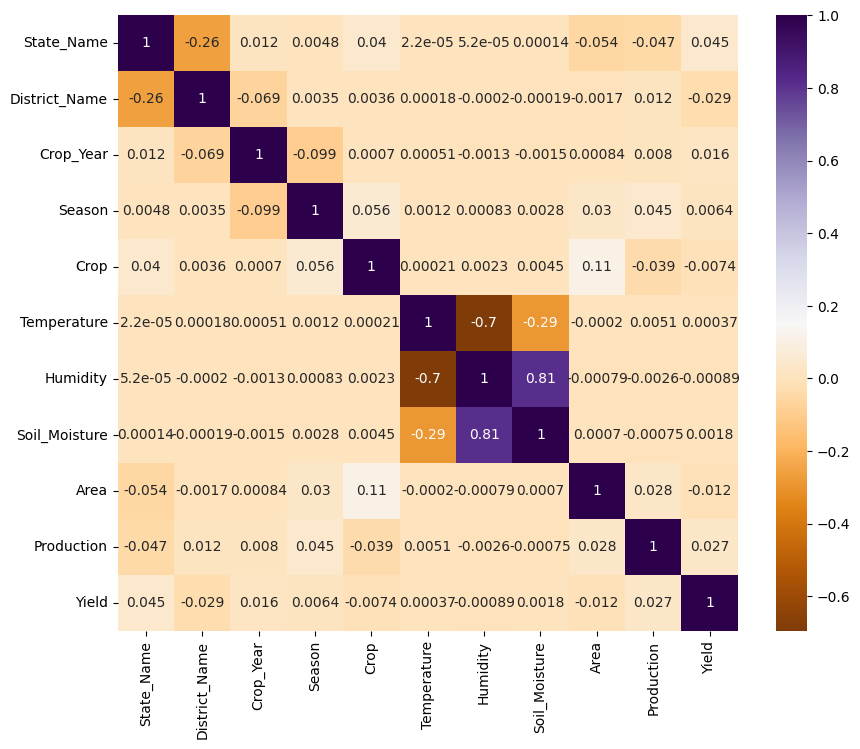

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Visualize Correlation Matrix
datacorr = crop_data.copy()
from sklearn.preprocessing import LabelEncoder

categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(datacorr.corr(), annot=True, cmap='PuOr')

# Show the plot
plt.show()


# Query 1. What is the average temperature for crop cultivation in a specific state?

In [12]:
import pandas as pd
# Calculate the overall average temperature for crop cultivation
average_temperature = crop_data['Temperature'].mean()

print(f"The overall average temperature for crop cultivation is: {average_temperature:.2f} degrees Celsius.")


The overall average temperature for crop cultivation is: 34.45 degrees Celsius.


# Query 2. How does humidity affect crop production?

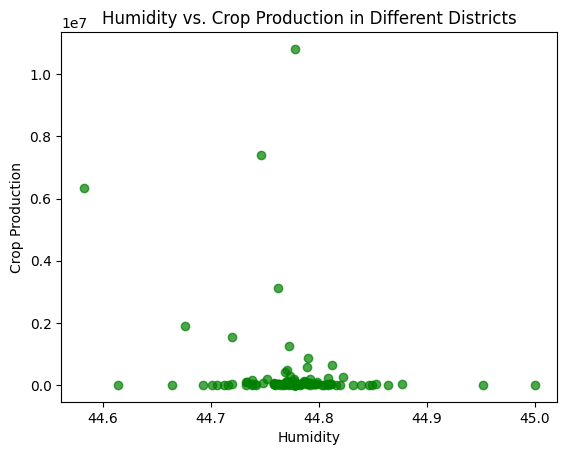

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crop_data' is your dataset
# Assuming 'District_Name', 'Humidity', and 'Production' are the relevant columns
# Adjust column names based on your dataset structure

# Select relevant columns
selected_columns = ['District_Name', 'Humidity', 'Production']
data_subset = crop_data[selected_columns]

# Group data by district and calculate the average humidity and production
grouped_data = data_subset.groupby('District_Name').mean().reset_index()

# Plotting
plt.scatter(grouped_data['Humidity'], grouped_data['Production'], color='green', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Crop Production')
plt.title('Humidity vs. Crop Production in Different Districts')
plt.show()


# Query 3. Which crops have the highest yield per unit area?

C:\Users\yash9\AppData\Local\Temp\ipykernel_29216\2510674191.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_yield_per_area.values, y=mean_yield_per_area.index, palette='viridis')


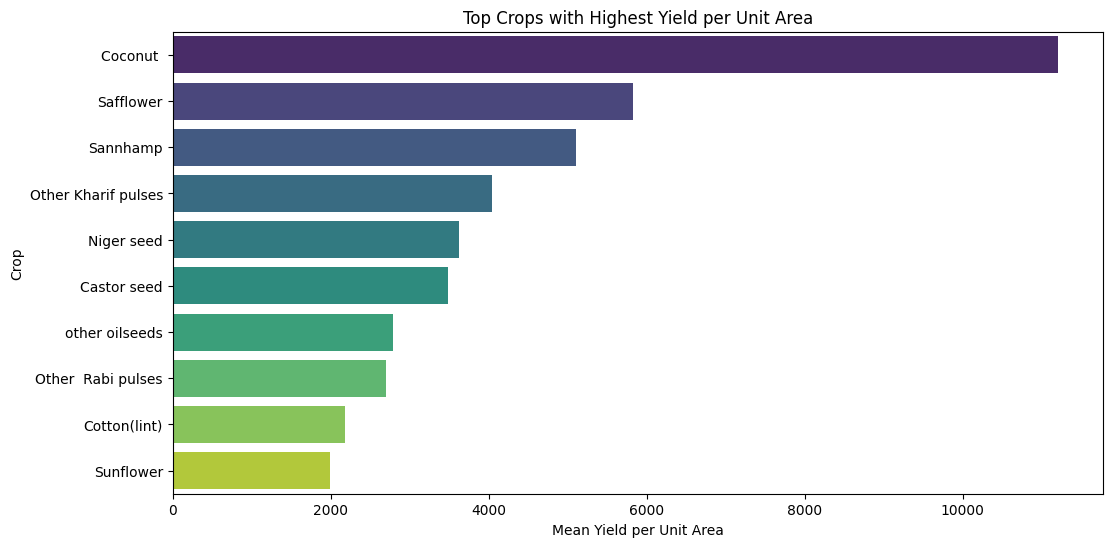

In [14]:
# Calculate yield per unit area (Yield/Area)
crop_data['Yield_Per_Area'] = crop_data['Production'] / crop_data['Area']

# Group by Crop and calculate the mean yield per unit area for each crop
mean_yield_per_area = crop_data.groupby('Crop')['Yield_Per_Area'].mean().sort_values(ascending=False).head(10)

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar chart
sns.barplot(x=mean_yield_per_area.values, y=mean_yield_per_area.index, palette='viridis')

# Set labels and title
plt.xlabel('Mean Yield per Unit Area')
plt.ylabel('Crop')
plt.title('Top Crops with Highest Yield per Unit Area')

# Show the plot
plt.show()

# Query 4. Is there a relationship between soil moisture and crop production?

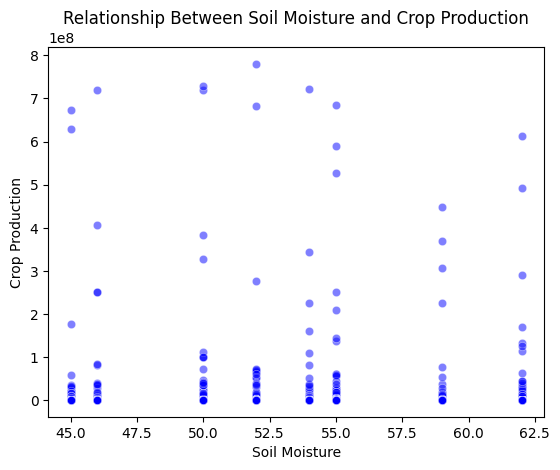

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot showing the relationship between soil moisture and crop production
sns.scatterplot(x='Soil_Moisture', y='Production', data=crop_data, alpha=0.5, color='blue')

plt.title('Relationship Between Soil Moisture and Crop Production')
plt.xlabel('Soil Moisture')
plt.ylabel('Crop Production')

plt.show()


# Query 5. What is the relationship between soil moisture and humidity in crop cultivation?


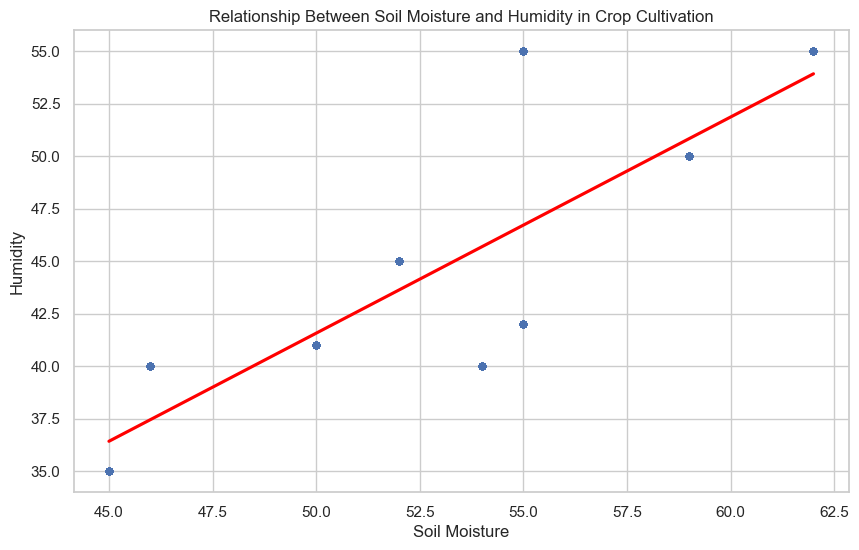

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming crop_data is your dataset
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Soil_Moisture', y='Humidity', data=crop_data, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Customize plot
plt.title('Relationship Between Soil Moisture and Humidity in Crop Cultivation')
plt.xlabel('Soil Moisture')
plt.ylabel('Humidity')

plt.show()


# Data Splitting

In [17]:
dummy = pd.get_dummies(crop_data)
dummy

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,Yield_Per_Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,36,35,45,1254.0,2000.0,1.594896,1.594896,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2000,37,40,46,2.0,1.0,0.500000,0.500000,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2000,36,41,50,102.0,321.0,3.147059,3.147059,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2000,37,42,55,176.0,641.0,3.642045,3.642045,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2000,36,40,54,720.0,165.0,0.229167,0.229167,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2006,36,35,45,27.0,7.0,0.259259,0.259259,False,False,...,False,False,False,False,False,False,False,False,False,False
49995,2006,37,40,46,27.0,32.0,1.185185,1.185185,False,False,...,False,False,False,False,False,False,False,False,False,False
49996,2006,36,41,50,450.0,213.0,0.473333,0.473333,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,2006,37,42,55,1778.0,309.0,0.173791,0.173791,False,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37499, 211)
x_test : (12500, 211)
y_train : (37499,)
y_test : (12500,)


In [19]:
print(x_train)
print(y_train)

       Crop_Year  Temperature  Humidity  Soil_Moisture     Area  \
27434       2009           36        40             54   2761.0   
13400       1999           36        35             45  57620.0   
883         2013           37        40             46    935.0   
7303        2004           36        40             54   9065.0   
49251       2005           36        35             45   7505.0   
...          ...          ...       ...            ...      ...   
11284       2002           35        50             59    130.0   
44732       2013           25        55             55     29.0   
38158       2010           37        42             55   2347.0   
860         2013           34        45             52      2.0   
15795       2009           37        40             46    767.0   

       Yield_Per_Area  State_Name_Andaman and Nicobar Islands  \
27434        4.527707                                   False   
13400        1.090142                                   False   


# Linear Regression:

In [20]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##### Prediction:

In [21]:
lr_predict = model.predict(x_test)
lr_predict

array([-101150.56546139, 5369376.30720351, -894553.22407621, ...,
        126550.77452005, -180202.84643745, -103923.3290664 ])

##### Model Evaluation:

In [22]:
from sklearn.metrics import mean_squared_error
lr_predict = model.predict(x_test)
print("MSE")
scores_regr = (mean_squared_error(y_test, lr_predict))
print(scores_regr)
# print(mean_squared_error(y_train, lr_predict))

MSE
138861556649228.17


##### Predicting and Visualizing Results:

In [23]:
# Predicting the test Results

lr_predict = model.predict(x_test)
lr_predict

array([-101150.56546139, 5369376.30720351, -894553.22407621, ...,
        126550.77452005, -180202.84643745, -103923.3290664 ])

In [24]:
model.score(x_test,y_test)

0.10252593424738343

In [25]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.10252593424738343


Text(0.5, 1.0, 'Linear Regression')

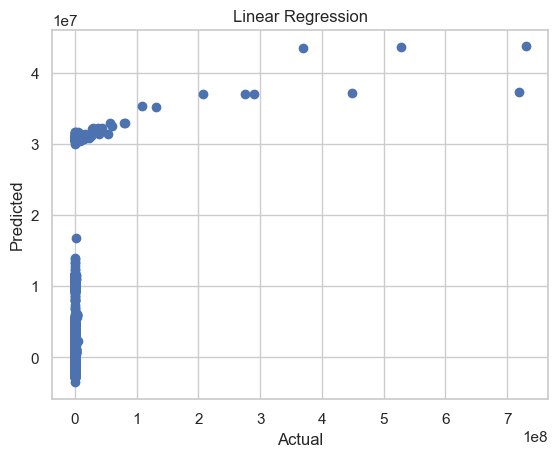

In [26]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination.
This tells us how well the unknown samples will be predicted by our model.

# <b> Decision Tree </b>

In [27]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([3004.,  114.,   15., ...,  367.,  399.,  508.])

In [28]:
regressor.score(x_test,y_test)

0.8463543549986969

Text(0.5, 1.0, 'Decision Tree ')

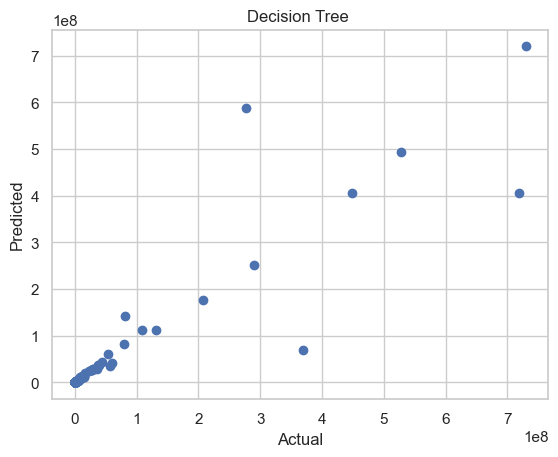

In [29]:
plt.scatter(y_test,decisiontree_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree ')

In [30]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

R2 score :  0.8463543549986969
Adj. R-Squared : 0.843716071218157


C:\Users\yash9\AppData\Local\Temp\ipykernel_29216\697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\yash9\AppData\Local\Temp\ipykernel_29216\697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Decision Tree Regression')

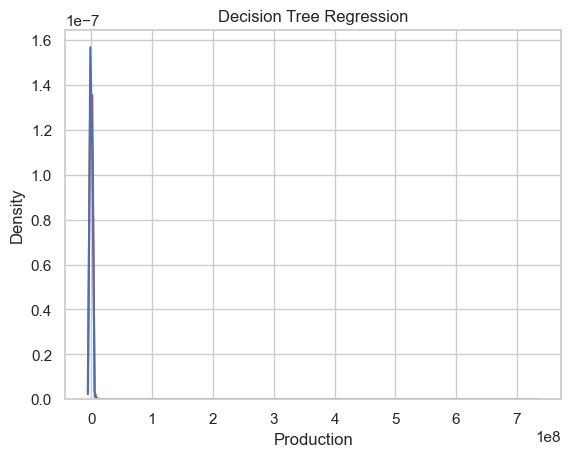

In [31]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

The R-squared score is 0.8464. This suggests that the decision tree model explains about 84.64% of the variance in the target variable. The model's fit to the data is quite good.

# **Random Forest Algorithm**

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

array([3020.63636364,  116.09090909,   15.18181818, ...,  366.72727273,
        464.63636364,  517.81818182])

In [33]:
model.score(x_test,y_test)

0.8802830316001752

In [34]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.8802830316001752


In [35]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8782273447241691


C:\Users\yash9\AppData\Local\Temp\ipykernel_29216\551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
C:\Users\yash9\AppData\Local\Temp\ipykernel_29216\551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

Text(0.5, 1.0, 'Random Forest Regression')

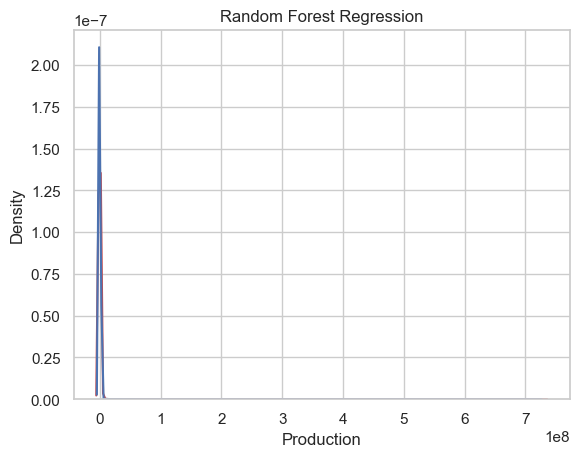

In [36]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

Text(0.5, 1.0, 'Random Forest')

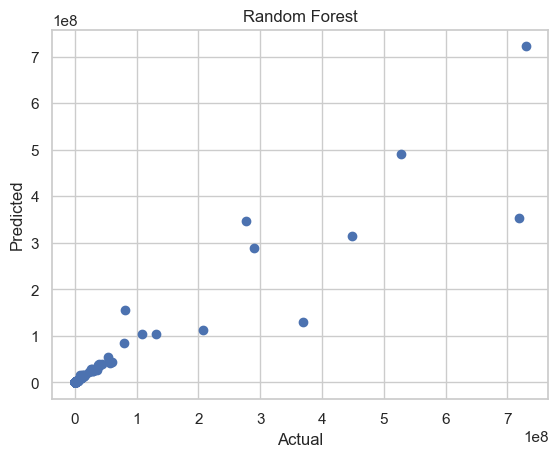

In [37]:
plt.scatter(y_test,rf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

The R-squared score is 0.8803. This indicates that the random forest model explains about 88.03% of the variance in the target variable. The model's fit to the data is strong.